# Autoencoder

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
import glob
%matplotlib inline

In [2]:
def loadData(files):
    fnames = glob.glob(files)
    X = np.array([plt.imread(fname)[:,:,0] for fname in fnames])
    sh = X[0].shape[0:2]
    return np.array([x.flatten()/255 for x in X]), sh

In [3]:
files =  'yalefaces_cropBackground/subject*'

# Load data
X_data, orig_shape = loadData(files)
n, d = X_data.shape

In [4]:
tf.reset_default_graph()

In [5]:
sess = tf.Session()

layer_encode = tf.layers.Dense(60,
                               activation=tf.nn.leaky_relu,
                               kernel_initializer=tf.initializers.random_uniform(-.001,.001),
                               bias_initializer=tf.initializers.random_uniform(-.001,.001))

layer_decode = tf.layers.Dense(d,
                               activation=tf.nn.leaky_relu,
                               kernel_initializer=tf.initializers.random_uniform(-.001,.001),
                               bias_initializer=tf.initializers.random_uniform(-.001,.001))

var_x = tf.placeholder(shape=[None,d], dtype=tf.float32)  # where the X_data is fed in

x_lowdim = layer_encode(var_x)
x_recon = layer_decode(x_lowdim)

In [6]:
var_loss = tf.losses.mean_squared_error(labels=var_x,predictions=x_recon)
op_optimizer = tf.train.AdamOptimizer().minimize(var_loss)

In [7]:
sess.run(tf.global_variables_initializer())

In [8]:
num_steps = 10000
for step in range(1, num_steps+1):
    _, loss = sess.run([op_optimizer, var_loss], feed_dict={var_x: X_data})
    if (step % 100 == 0):
        print("Step " + str(step) + ":", loss)

Step  100 : 0.025563125
Step  200 : 0.01509138
Step  300 : 0.010726686
Step  400 : 0.008928091
Step  500 : 0.0076758573
Step  600 : 0.0070462925
Step  700 : 0.0064072553
Step  800 : 0.005917074
Step  900 : 0.0052404087
Step  1000 : 0.005099636
Step  1100 : 0.0046326327
Step  1200 : 0.004493259
Step  1300 : 0.004795843
Step  1400 : 0.004365688
Step  1500 : 0.004203365
Step  1600 : 0.0041592247
Step  1700 : 0.003991239
Step  1800 : 0.0039172885
Step  1900 : 0.0037644708
Step  2000 : 0.0035551982
Step  2100 : 0.003519339
Step  2200 : 0.003411861
Step  2300 : 0.0029996498
Step  2400 : 0.0030035628
Step  2500 : 0.003156974
Step  2600 : 0.0026438204
Step  2700 : 0.002464872
Step  2800 : 0.0024102274
Step  2900 : 0.0024039748
Step  3000 : 0.002519802
Step  3100 : 0.0021336842
Step  3200 : 0.0023194698
Step  3300 : 0.0022390417
Step  3400 : 0.0022533066
Step  3500 : 0.0020658348
Step  3600 : 0.0027460572
Step  3700 : 0.0021030647
Step  3800 : 0.0021145171
Step  3900 : 0.0022778048
Step  4000 :

In [9]:
X_NN = sess.run(x_recon, feed_dict={var_x: X_data})

In [10]:
# PCA

# Caculate sample mean for data centering
mu = np.mean(X_data, axis=0)
M = np.outer(np.ones(n), mu)
Xc = X_data - M

# Compute SVD of centered data
U, S, V = la.svd(Xc, full_matrices=False)

# Construct projection matrix from the p largest eigenvectors
p = 60
Vp = V[0:p, :]

# Project and Reconstruct
Z = X_data.dot(Vp.T)
X_PCA = M + Z.dot(Vp)

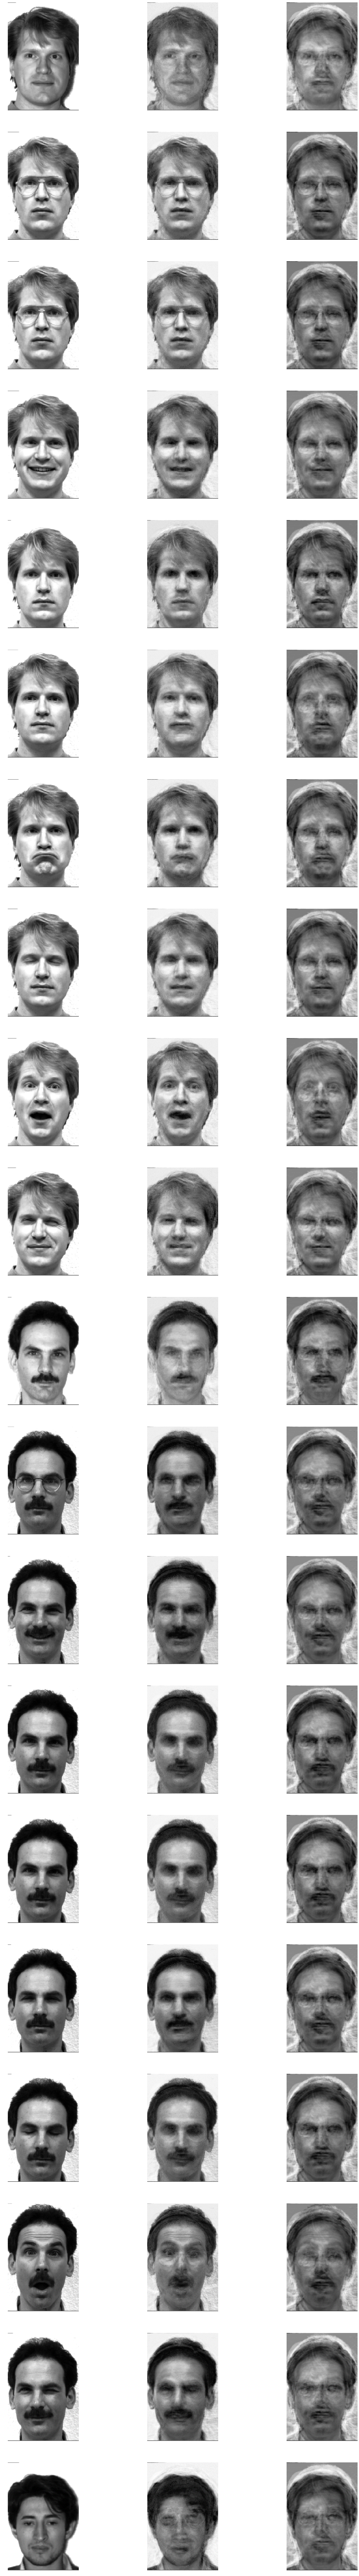

In [11]:
#Plot images
nrows = 20
ncols = 3
plt.figure(figsize=(30, nrows*10))
for i in range(nrows):
    x_dat, x_nn, x_pca = X_data[i, :], X_NN[i, :], X_PCA[i, :]
    plt.subplot(nrows, ncols, i * ncols + 1)
    plt.imshow(x_dat.reshape(orig_shape), cmap=cm.Greys_r)
    plt.axis('off')
    plt.subplot(nrows, ncols, i * ncols + 2)
    plt.imshow(x_nn.reshape(orig_shape), cmap=cm.Greys_r)
    plt.axis('off')
    plt.subplot(nrows, ncols, i * ncols + 3)
    plt.imshow(x_pca.reshape(orig_shape), cmap=cm.Greys_r)
    plt.axis('off')

In [12]:
err_NN, err_PCA = 0, 0
for i in range(n):
    err_NN += np.dot(X_data[i]-X_NN[i],X_data[i]-X_NN[i])
    err_PCA += np.dot(X_data[i]-X_PCA[i],X_data[i]-X_PCA[i])
print("Error NN:")
print(err_NN)
print(err_NN/n)
print("\nError PCA:")
print(err_PCA)
print(err_PCA/n)

Error NN:
17428.011656386945
128.14714453225696

Error PCA:
1023422.02275131
7525.161931994927
